In [1]:
import numpy as np
from matplotlib import pyplot as plt

## creation d'un jeu de données simple

In [2]:
#données pour tester le perceptron
X0=np.array([[1,-1],[3,2],[1,3],[-1,1],[1,5],[-1,4],[-2,2]])
Y0=np.array([-1,-1,-1,-1,1,1,1])

In [3]:
# fonction pour visualiser les points
def visualiser_points(X,Y):
        """représente les points de l'échantillon et leur classe en deux couleurs
        """
        plt.scatter(x=X[Y == 1, 0], y=X[Y == 1, 1], c='green', marker='o', edgecolor='black')
        plt.scatter(x=X[Y == -1, 0], y=X[Y == -1, 1], c='red', marker='o', edgecolor='black')
        plt.show()

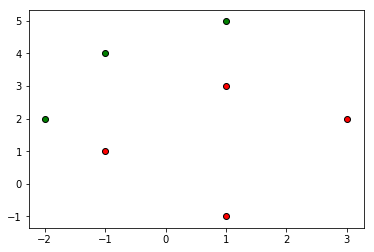

In [4]:
visualiser_points(X0,Y0)

## classe pour le perceptron

In [5]:
class Perceptron:
    
    def __init__(self):
        self.w = None #vecteur de poids, w[0] contient le biais
        
    def prediction(self,x):
        """une fois le perceptron entraîné, prédit la valeur sur un point
        ici x est un vecteur non augmenté (on a pas mis de 1 en coordonnée 0)"""
        return 1 if (self.w[0] + np.dot(self.w[1:],x) >=0) else -1
    
    def entrainement(self, X, Y, nb_etapes_max = 10000, rapport = False, liste = None):
        """X est un jeu de données d-dimensionnelles (np.arrays) 
        (non augmentées de 1 pour le biais)
        Y est l'ensemble des valeurs +1/-1 correspondantes
        Y[i] est la classe de X[i]
        L'algorithme du perceptron va tourner au maximum
        sur le nombre d'étapes données jusqu'à convervence
        Si liste==True , renvoie la liste des poids w successifs"""
        
        etape = 0 # compteur d'étapes
        en_cours = True

        
        #initialisation des poids à 0
        self.w = np.array([0]*(1+len(X[0])), dtype=float)
        if liste:
            liste_w = [np.copy(self.w)]
        else:
            liste_w = None
            
        while en_cours and etape < nb_etapes_max:
            #recherche du premier point mal classifié
            i = 0
            while i< len(X) and self.prediction(X[i]) == Y[i]:
                #le point est bien classé
                i += 1
            
            if i==len(X):
                #tous les points sont bien classifiés 
                en_cours = False
                break
            else:
                #X[i] est mal classifié
                
                self.w[0] += Y[i]
                self.w[1:] += Y[i]*X[i]
                if liste:
                    liste_w.append(np.copy(self.w))
                
            etape += 1
            
        if rapport:
            if etape < nb_etapes_max:
                print("Nombre d'étapes pour convergence :", etape)
            else:
                print("pas de convergence")
        return liste_w

## entrainement sur les données et visualisation

In [6]:
p = Perceptron()

In [7]:
liste_w = p.entrainement(X0,Y0, rapport=True, liste=True) # on recupère la liste des w successifs
#affichage du vecteur de poids final
print(p.w)

Nombre d'étapes pour convergence : 18
[-8. -4.  3.]


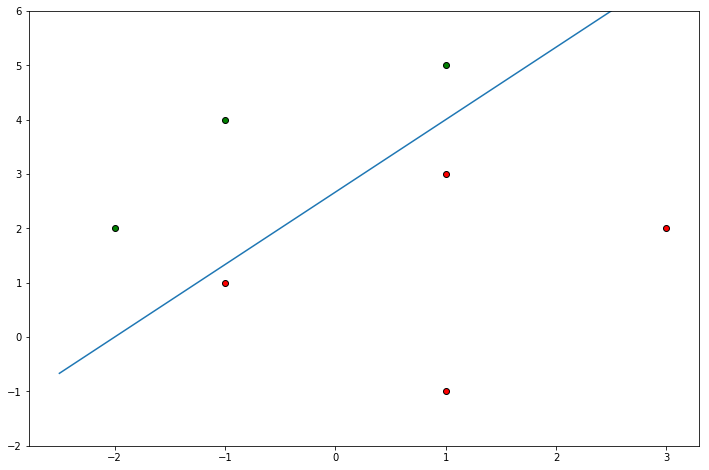

In [8]:
plt.figure(figsize=(12,8))
plt.ylim((-2,6))
plt.scatter(x=X0[Y0 == 1, 0], y=X0[Y0 == 1, 1], c='green', marker='o', edgecolor='black')
plt.scatter(x=X0[Y0 == -1, 0], y=X0[Y0 == -1, 1], c='red', marker='o', edgecolor='black')

Xlin = np.linspace(-2.5,3,200)
w = p.w
Y = -w[1]/w[2]*Xlin - w[0]/w[2]    # w1 x1 + w2 x2 + w0=0
plt.plot(Xlin,Y)
plt.show()

## etapes avant convergence

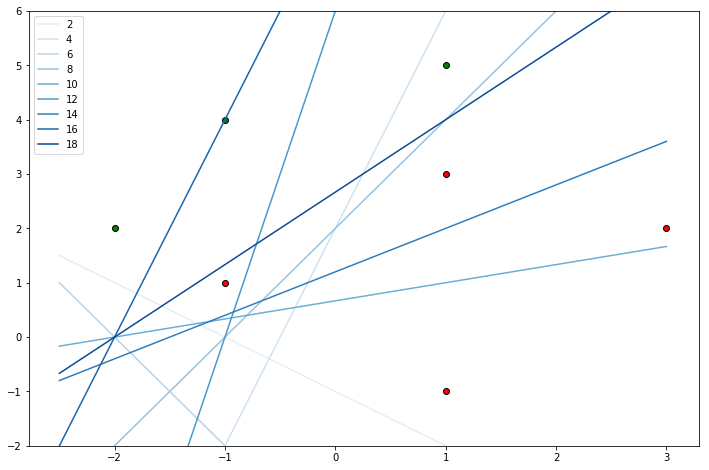

In [10]:
plt.figure(figsize=(12,8))
plt.ylim((-2,6))
plt.scatter(x=X0[Y0 == 1, 0], y=X0[Y0 == 1, 1], c='green', marker='o', edgecolor='black')
plt.scatter(x=X0[Y0 == -1, 0], y=X0[Y0 == -1, 1], c='red', marker='o', edgecolor='black')
blues = plt.get_cmap('Blues')  # this returns a colormap
Xlin = np.linspace(-2.5,3,200)
for i in range(2,len(liste_w),2):
    w = liste_w[i]
    if w[2] != 0:
        Y = -w[1]/w[2]*Xlin - w[0]/w[2]    # w1 x1 + w2 x2 + w0=0
        plt.plot(Xlin,Y, label = i, color = blues(i/20))
plt.legend()
plt.show()

## test sur données aléatoires séparables
Données générées aléatoirement de part et d'autre de la droite y = 1 - x